In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import seaborn as sns


In [2]:
# Replace the path with your file if needed
df = pd.read_csv('/content/Mall_Customers.csv')
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# Drop irrelevant columns (like 'CustomerID', 'Gender')
data = df[['Annual Income (k$)', 'Spending Score (1-100)']]


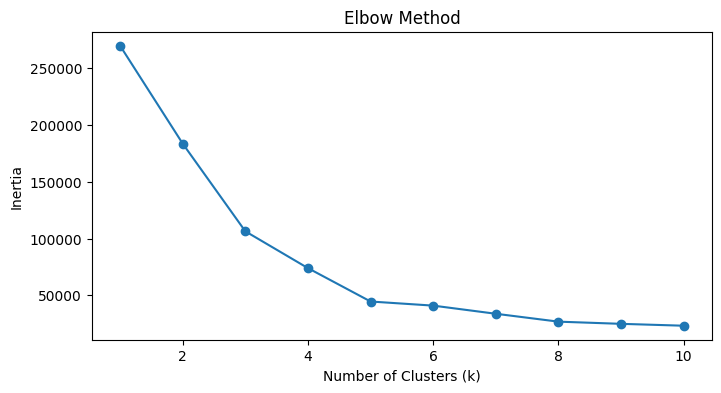

In [4]:
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


In [5]:
k_optimal = 5  # Replace with the elbow-determined value
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
df['Cluster'] = kmeans.fit_predict(data)


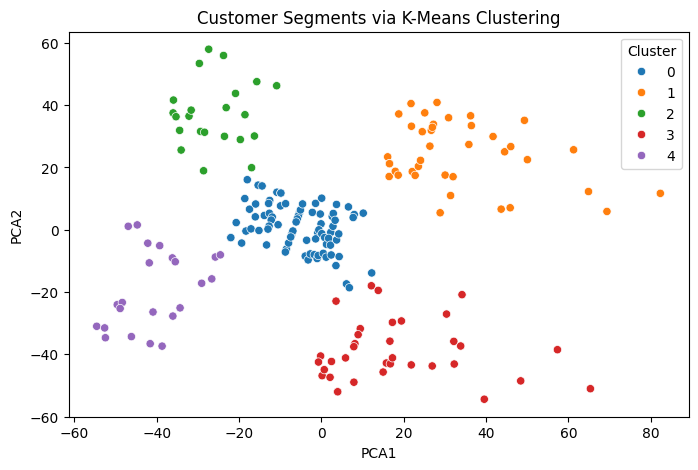

In [6]:
# If more than 2 features, reduce using PCA
pca = PCA(n_components=2)
components = pca.fit_transform(data)
df['PCA1'] = components[:, 0]
df['PCA2'] = components[:, 1]

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='tab10')
plt.title('Customer Segments via K-Means Clustering')
plt.show()


In [7]:
score = silhouette_score(data, df['Cluster'])
print(f'Silhouette Score: {score:.3f}')


Silhouette Score: 0.554
